**Linear Models for Regression**

Here are the typical steps that you will see in most ML projects:

1. Problem formulation
2. Collecting the data
3. Exploraroty Data Analysis
4. Data Processing
5. Choosing and Training a model
6. Evaluating a model
7. Improving a model

1. **Problem Formulation**

Here is the problem. There is a real state agent who knows that you're a Machine Learning Engineer and would like you to help out with building a machine learning model that can predict the price of the house given the information about that particular house.

Understanding the problem well goes beyond determining the right models for the problem, but also to doing effecting data processing and error analysis as you will be finding out.

2. **Collecting the data**

Ideally, the real estate agent would hand you his/her housing data but unfortunately he/she told you, that the model will be used in California, so it's okay to use the California housing dataset available on public and free to us

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

Let's get the real data. You can learn more about the data at **Kaggle**.

In [1]:
import urllib.request 

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [4]:
cal_data=download_read_data(data_path)

In [5]:
cal_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
cal_data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

Information about the features 

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Source: Kaggle

In [7]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
cal_data.shape

(20640, 10)

**3.Exploratory Data Analysis**

This is where we are going to understand more about the data. But before we get there, let's split the data into training and testing sets. This is because on the course of data analysis and processing, there can be data leakage. Put it in other words, we don't want the model to see the data that it will be tested on. If it does, it will show that it can make good predictions (or generalize well) on test data because it saw it, but it will fail on giving accurate predictions on the future data.

As a side notes, training set is used during the model training, and testing set is used during the model evaluation

So to split the data, sklearn provides a function for that.

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(cal_data,test_size=0.1,random_state=42)

In [12]:
print("the size of training data:{}\nthe size of testing data:{}".format(len(train_data),len(test_data)))

the size of training data:18576
the size of testing data:2064


As you can see, we have allocated 10 percent of the full data to the test set.

In [13]:
# Let's copy the training data in case we mess things up

cal_train = train_data.copy()

**Checking data statistics**

In [14]:
# By default, describe shows the stats of the numerical features. 
# include paramater gives us option to show all features 
train_data.describe(include="all").transpose()

count unique        top  freq           mean  \
longitude           18576.0    NaN        NaN   NaN    -119.575033   
latitude            18576.0    NaN        NaN   NaN      35.636918   
housing_median_age  18576.0    NaN        NaN   NaN      28.611488   
total_rooms         18576.0    NaN        NaN   NaN    2637.706126   
total_bedrooms      18576.0    NaN        NaN   NaN     537.863211   
population          18576.0    NaN        NaN   NaN    1427.055879   
households          18576.0    NaN        NaN   NaN     499.649763   
median_income       18576.0    NaN        NaN   NaN       3.872836   
median_house_value  18576.0    NaN        NaN   NaN  206861.739233   
ocean_proximity       18576      5  <1H OCEAN  8221            NaN   

                              std      min       25%       50%       75%  \
longitude                 2.00384  -124.35    -121.8    -118.5   -118.01   
latitude                 2.135052    32.55     33.93     34.26     37.72   
housing_median_age      12.596526      1.0      18.0      29.0      37.0   
total_rooms           2181.859884      2.0   1450.75    2127.0    3150.5   
total_bedrooms         419.157368      1.0     296.0     436.0     647.0   
population            1139.915138      3.0     787.0    1167.0    1726.0   
households             381.686386      1.0     280.0     410.0     605.0   
median_income            1.891866   0.4999    2.5643    3.5433    4.7569   
median_house_value  115386.011008  14999.0  119700.0  179650.0  264900.0   
ocean_proximity               NaN      NaN       NaN       NaN       NaN   

                         max  
longitude            -114.31  
latitude               41.95  
housing_median_age      52.0  
total_rooms          39320.0  
total_bedrooms        6445.0  
population           35682.0  
households            6082.0  
median_income        15.0001  
median_house_value  500001.0  
ocean_proximity          NaN

**Checking Missing Values**

In [15]:
train_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

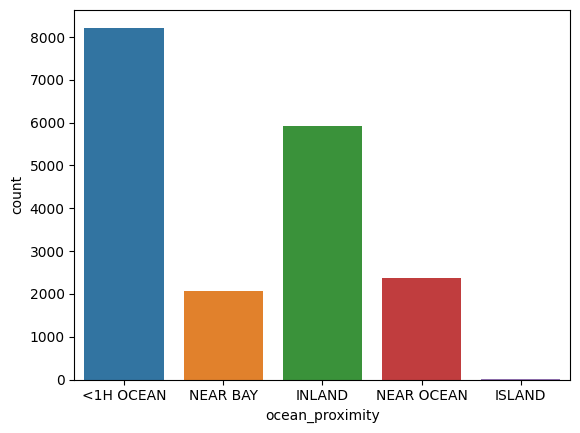

In [16]:
sns.countplot(data=train_data,x="ocean_proximity")

In [17]:
correlation = train_data.corr()
correlation["median_house_value"]

<ipython-input-17-2b5560e098be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


longitude            -0.047552
latitude             -0.142503
housing_median_age    0.105493
total_rooms           0.135327
total_bedrooms        0.050577
population           -0.023859
households            0.065760
median_income         0.689782
median_house_value    1.000000
Name: median_house_value, dtype: float64

<ipython-input-18-41df1a4f8568>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="viridis")


<Axes: >

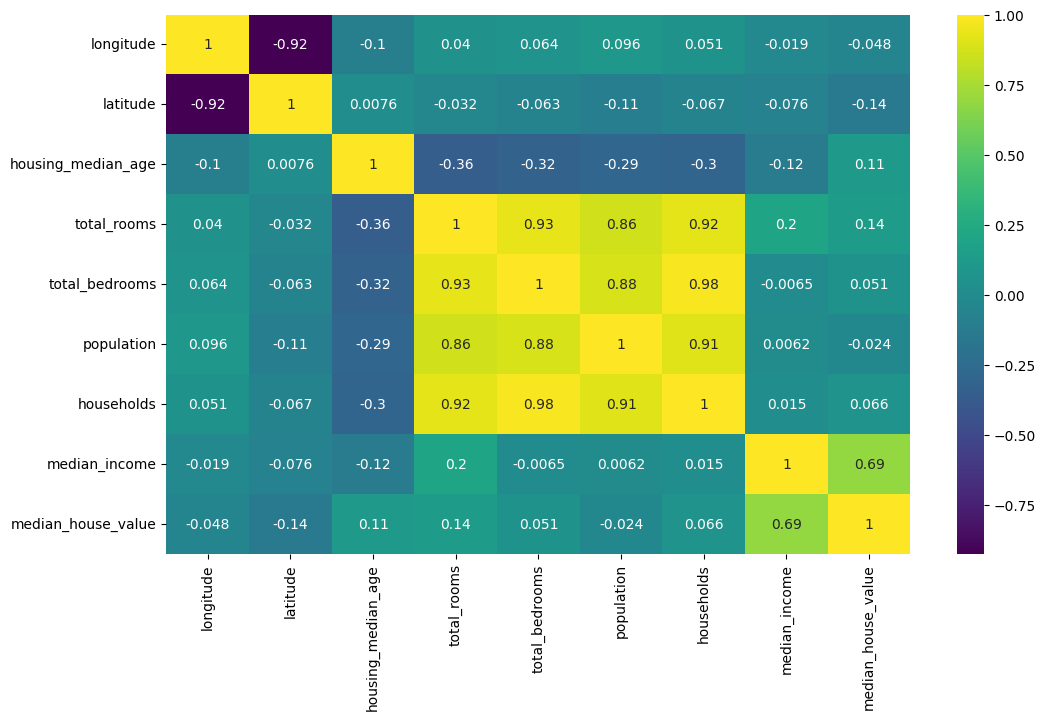

In [18]:
#### Visualizing correlation

plt.figure(figsize=(12,7))
sns.heatmap(train_data.corr(),annot=True,cmap="viridis")

Some features like total_bedrooms and households are highly correlated. Same things for total_bedrooms and total_rooms and that makes sense because for many houses, the number of people who stay in that particular house (households) goes with the number of available rooms(total_rooms) and bed_rooms.

The other interesting insights is that the price of the house is closely correlated with the median income, and that makes sense too. For many cases, you will resonably seek house that you will be able to afford based on your income.

**Plotting Geographical Features**

<Axes: xlabel='longitude', ylabel='latitude'>

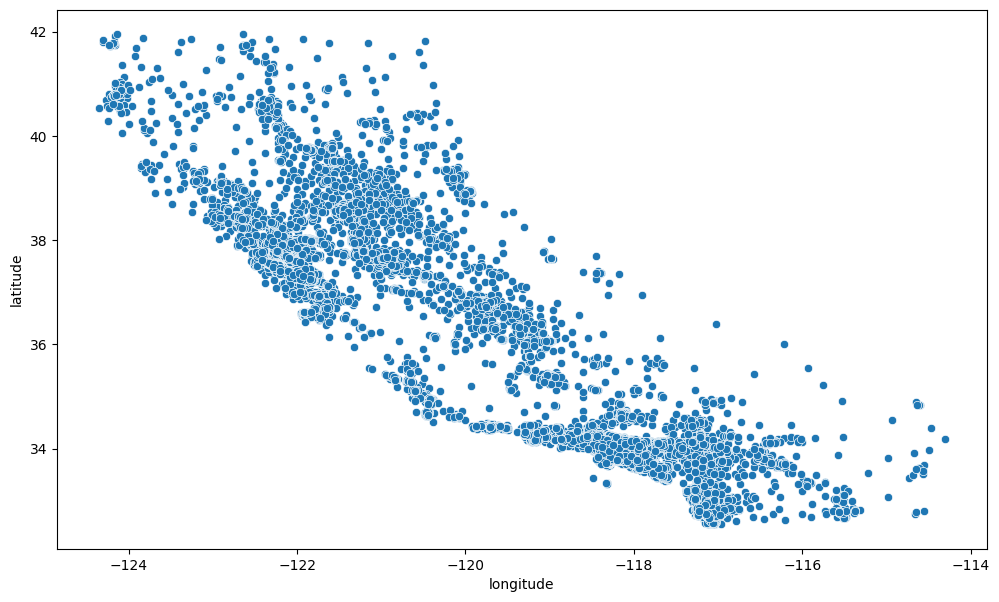

In [19]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

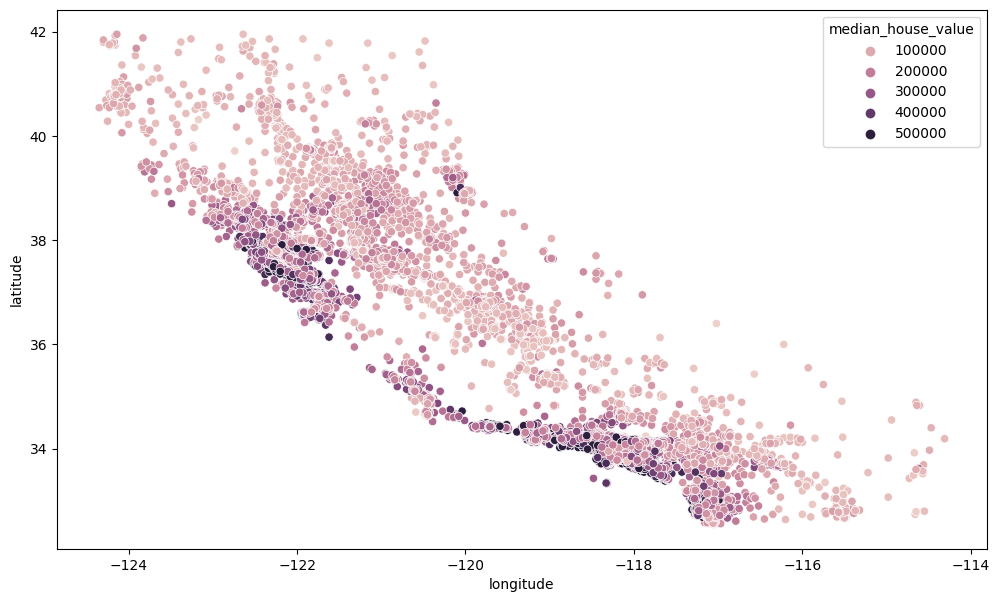

In [20]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

<Axes: xlabel='longitude', ylabel='latitude'>

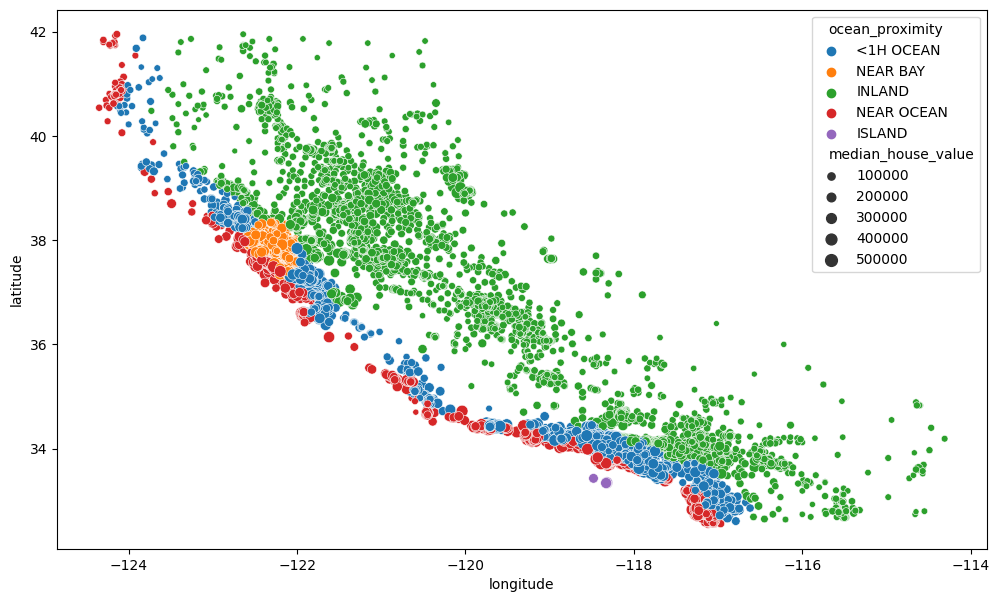

In [21]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

all houses near the ocean are very expensive compared to other areas.

**Exploring Relationship Between Individual Features**

<Axes: xlabel='median_house_value', ylabel='median_income'>

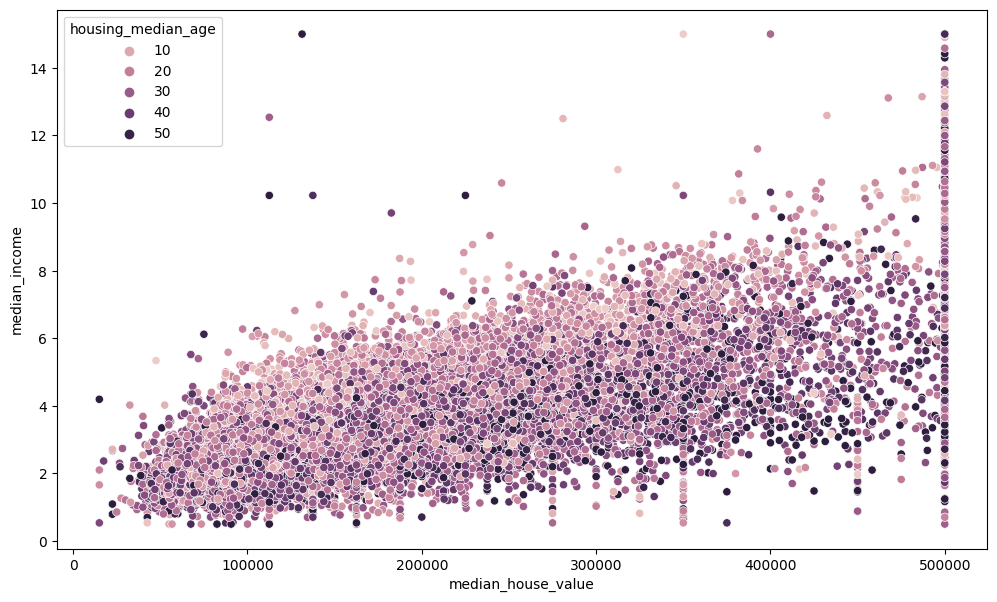

In [22]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue='housing_median_age')

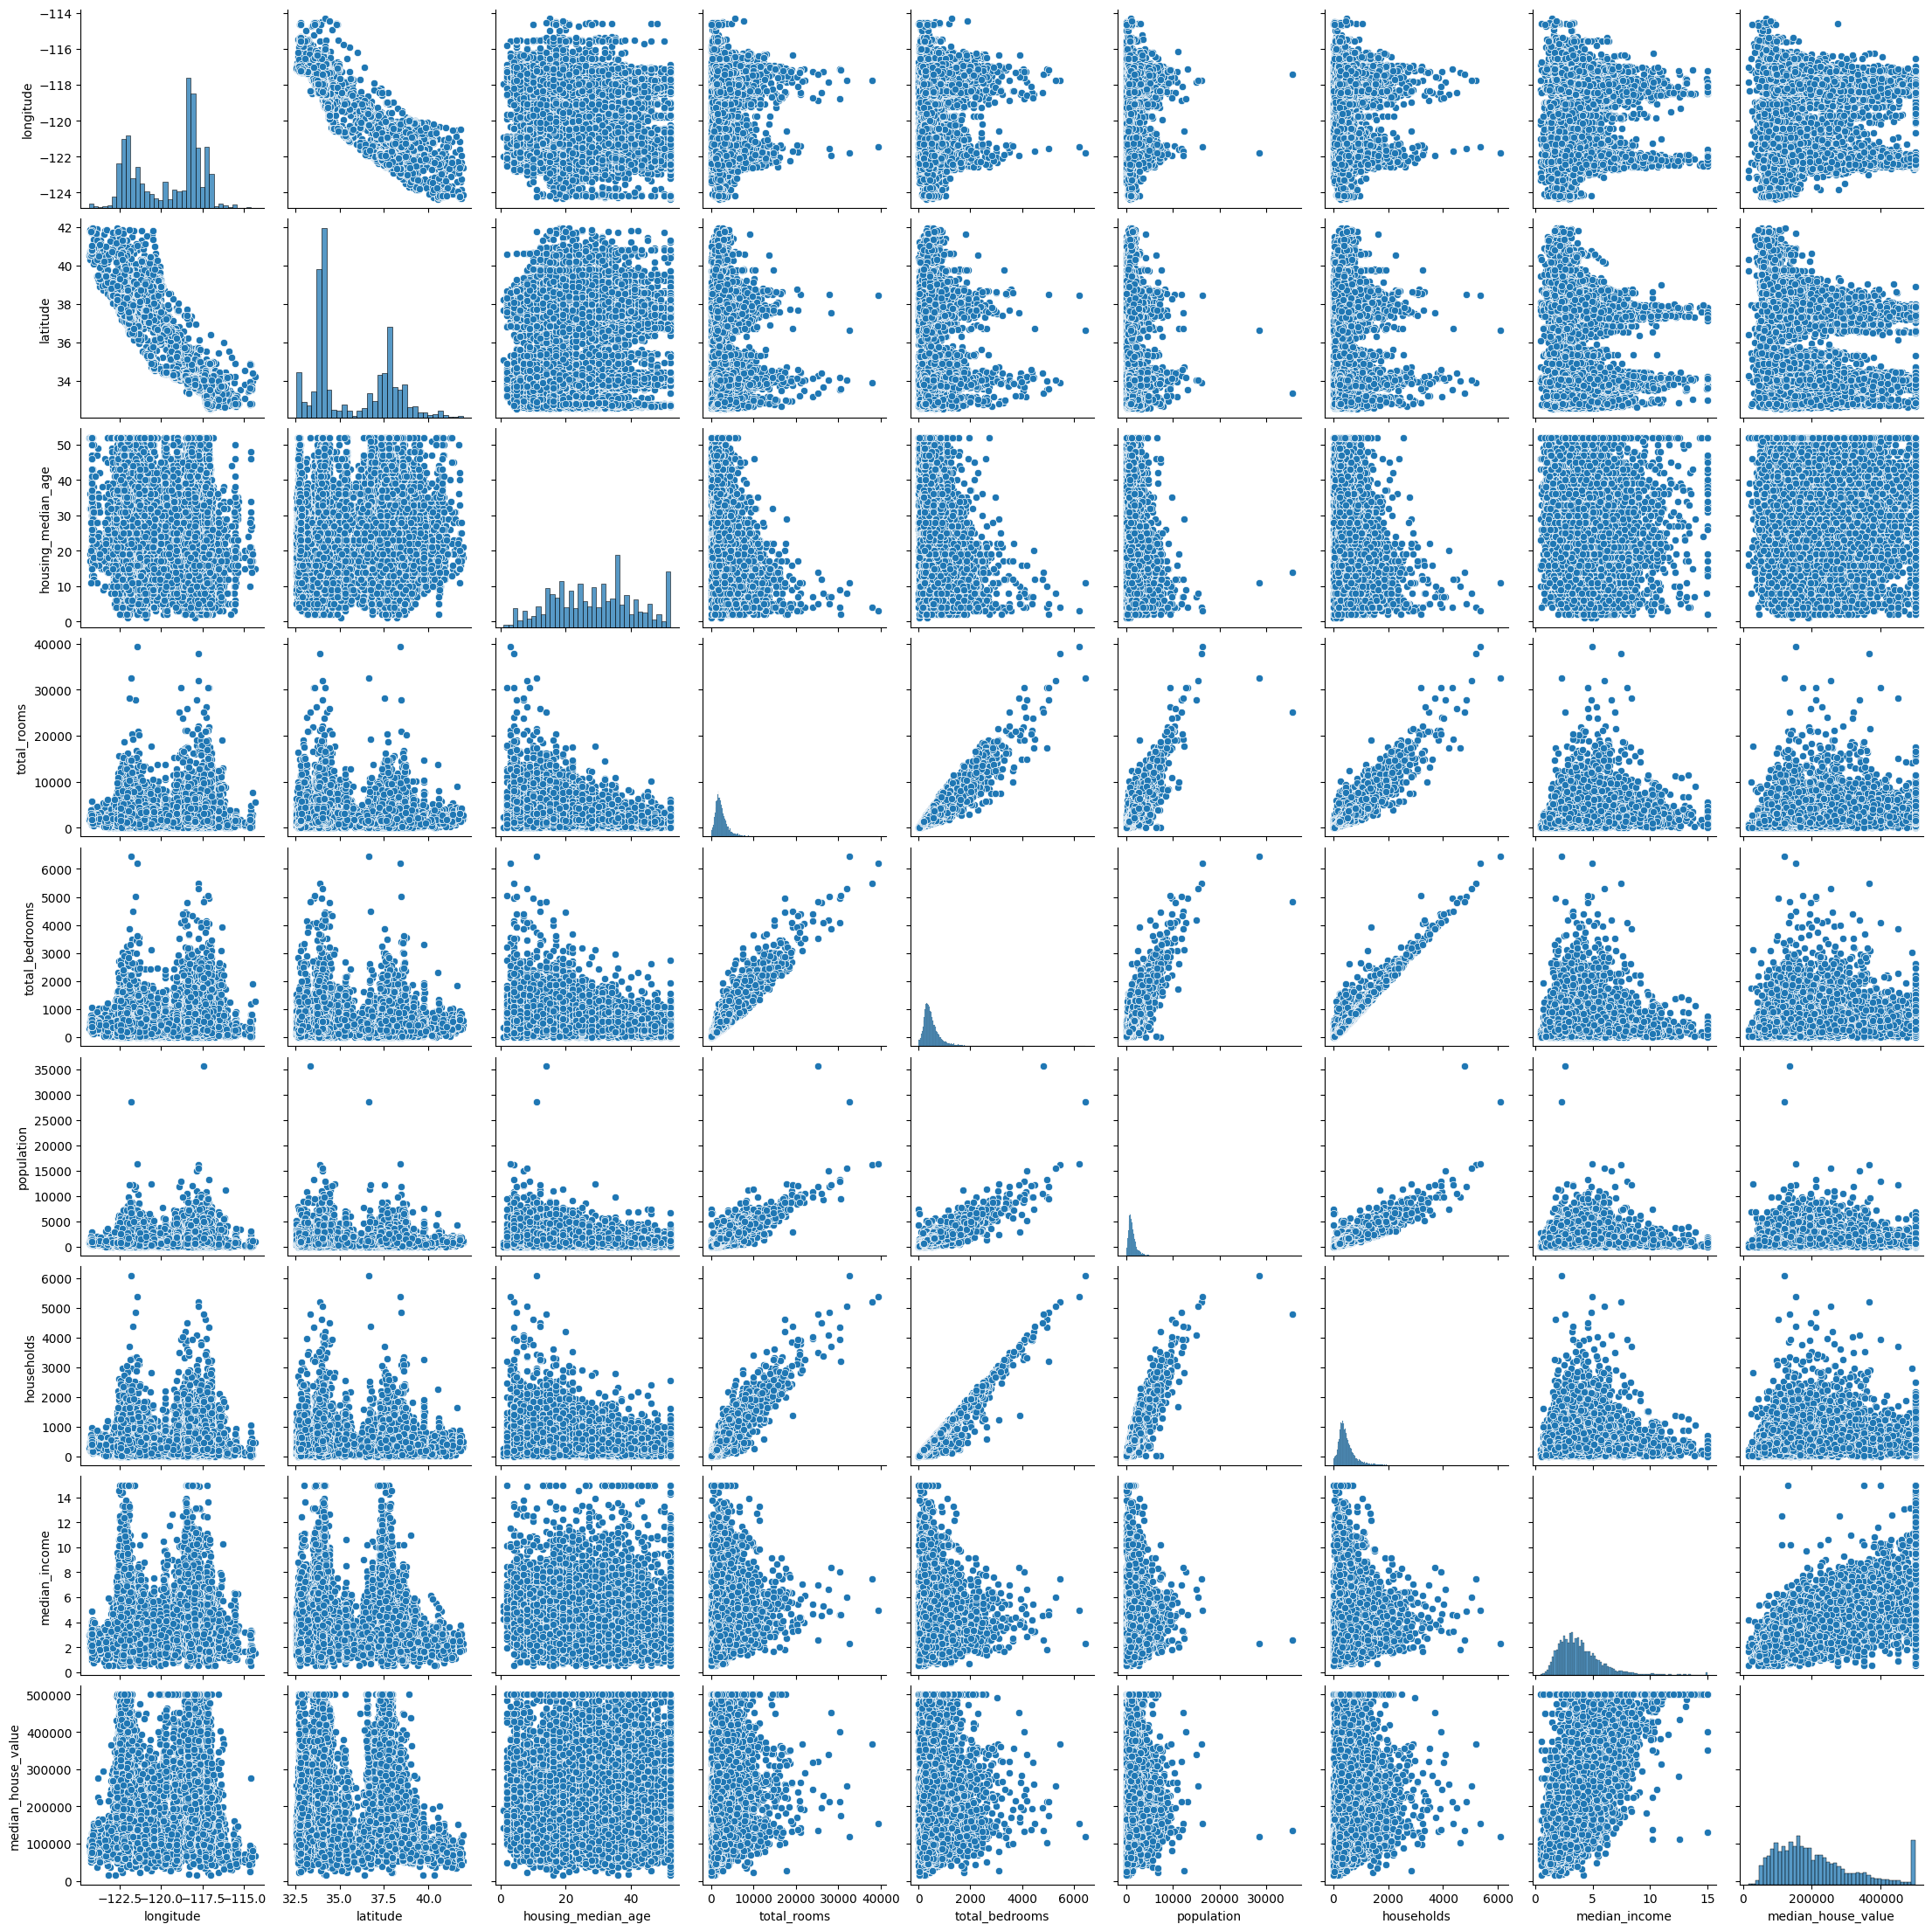

In [23]:
sns.pairplot(train_data)

as you can see, it plots the relationship between all numerical features and histograms of each feature as well. But it's slow...

To summarize the data exploration, the goal here it to understand the data as much as you can. There is no limit to what you can inspect. And understanding the data will help you build an effective ML systems.

4. **Data Preprocessing**

In this part, it's where we prepare the data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

Here are three most things that we will take care of in our dataset:


1. Missing values

2. Encoding categorical features

3. Scaling numerical features

As much as we can we will use functions so that we can rerun the same transformations on the test set.

Since we are going to prepare the data for the ML model, let's create an input training data and the training label, label being median_house_value. Since the data is a Pandas dataframe, we will use drop function. Let's do that!

In [24]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [25]:
training_input_data.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5564     -118.29     33.91                41.0       2475.0           532.0   
16016    -122.46     37.73                52.0       3547.0           506.0   
17131    -122.15     37.46                30.0       4198.0          1244.0   

       population  households  median_income ocean_proximity  
5564       1416.0       470.0         3.8372       <1H OCEAN  
16016      1276.0       491.0         8.0069        NEAR BAY  
17131      2678.0      1147.0         3.6712        NEAR BAY

In [26]:
training_labels

5564     156400.0
16016    426800.0
17131    308600.0
11752    239200.0
2308     109400.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 18576, dtype: float64

In [30]:
training_input_data['ocean_proximity'].value_counts()

<1H OCEAN     8221
INLAND        5913
NEAR OCEAN    2366
NEAR BAY      2071
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

<1H OCEAN     8221
INLAND        5913
NEAR OCEAN    2366
NEAR BAY      2071
ISLAND           5
Name: ocean_proximity, dtype: int64

In [43]:
num_feats = training_input_data.drop('ocean_proximity', axis=1)

In [32]:
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)

In [33]:
cat_feats_encoded.head()

5564     0
16016    3
17131    3
11752    1
2308     1
Name: ocean_proximity, dtype: int64

**Handling Categorical Features with Sklearn**

In [34]:
from sklearn.preprocessing import OrdinalEncoder

def ordinary_encoder(input_data):
  
  encoder = OrdinalEncoder()
  
  output = encoder.fit_transform(input_data)

  return output

**One Hot Encoding**

One hot encoding is most preferred when the categories are not in any order and that is exactly how our categorical feature is. This is what I mean by saying unordered categories: If you have 3 cities and encode them with numbers (1,2,3) respectively, a machine learning model may learn that city 1 is close to city 2 and to city 3. As that is a false assumption to make, the model will likely give incorrect predictions if the city feature plays an important role in the analysis.

On the flip side, if you have the feature of ordered ranges like low, medium, and high, then numbers can be an effective way because you want to keep the sequence of these ranges.

In our case, the ocean proximity feature is not in any order. By using one hot, The categories will be converted into binary representation (1s or 0s), and the orginal categorical feature will be splitted into more features, equivalent to the number of categories.

In [40]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(input_data):

  one_hot_encoder = OneHotEncoder()
  output = one_hot_encoder.fit_transform(input_data)
  
  # The output of one hot encoder is a sparse matrix. 
  # It's best to convert it into numpy array 
  output = output.toarray()

  return output

In [41]:
cat_feats = training_input_data[['ocean_proximity']]

cat_feats_hot = one_hot(cat_feats)

cat_feats_hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**Scaling Numerical features**

After we have imputed missing values, and converted categorical features into numbers, it's time to scale the numerical features.

But why do we have to scale numerical features? Most machine learning models will work well when given small input values, and best if they are in the same range.

For that reason, there are two most techniques to scale features:

Normalization where the features are scaled to values between 0 and 1. And
Standardization where the features are rescaled to have 0 mean and unit standard deviation. When working with datasets containing outliers (such as time series), standardization is the right option in that particular case.
Both of those techniques are implemented quite easily in Sklearn, Normalization with MinMaxScaler, and standardization with StandardScaler.

In [44]:
#normalizing numerical features
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scalar = MinMaxScaler()
num_scaled = scalar.fit_transform(num_feats)
num_scaled

array([[0.60358566, 0.14468085, 0.78431373, ..., 0.03960313, 0.07712547,
        0.23015545],
       [0.18824701, 0.55106383, 1.        , ..., 0.03567925, 0.08057885,
        0.517717  ],
       [0.21912351, 0.52234043, 0.56862745, ..., 0.07497407, 0.18845585,
        0.21870733],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.04913254, 0.08649893,
        0.16789424],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.04972112, 0.09176122,
        0.35994676],
       [0.19223108, 0.55531915, 1.        , ..., 0.07332044, 0.20407828,
        0.14314285]])

In [45]:
## Standardizing numerical features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[ 0.64130268, -0.80886286,  0.98351287, ..., -0.00969912,
        -0.07768305, -0.01883674],
       [-1.43975779,  0.9803686 ,  1.85679302, ..., -0.13251859,
        -0.02266257,  2.18523706],
       [-1.28505066,  0.8539046 ,  0.11023273, ...,  1.09743063,
         1.69607218, -0.10658316],
       ...,
       [ 0.5963877 , -0.75265664,  0.58656735, ...,  0.28857672,
         0.07165824, -0.4960504 ],
       [-1.19023016,  0.91011082, -1.08060383, ...,  0.30699964,
         0.15549896,  0.97597509],
       [-1.41979558,  0.99910401,  1.85679302, ...,  1.045671  ,
         1.94497432, -0.68576239]])

**Putting All Data Preprocessing Steps Into A Single Pipeline**

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_feats_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='mean')), 
                  ('scaler', StandardScaler())         
            ])

num_feats_preprocessed = num_feats_pipe.fit_transform(num_feats)
num_feats_preprocessed

array([[ 0.64130268, -0.80886286,  0.98351287, ..., -0.00969912,
        -0.07768305, -0.01883674],
       [-1.43975779,  0.9803686 ,  1.85679302, ..., -0.13251859,
        -0.02266257,  2.18523706],
       [-1.28505066,  0.8539046 ,  0.11023273, ...,  1.09743063,
         1.69607218, -0.10658316],
       ...,
       [ 0.5963877 , -0.75265664,  0.58656735, ...,  0.28857672,
         0.07165824, -0.4960504 ],
       [-1.19023016,  0.91011082, -1.08060383, ...,  0.30699964,
         0.15549896,  0.97597509],
       [-1.41979558,  0.99910401,  1.85679302, ...,  1.045671  ,
         1.94497432, -0.68576239]])

In [48]:
num_feats_pipe.steps[0]

('imputer', SimpleImputer())

In [49]:
num_feats_pipe.steps[1]

('scaler', StandardScaler())

In [50]:
cat_feats_pipe = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_preprocessed = cat_feats_pipe.fit_transform(cat_feats)

In [51]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', cat_feats_pipe, cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [52]:
training_data_preprocessed

array([[ 0.64130268, -0.80886286,  0.98351287, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43975779,  0.9803686 ,  1.85679302, ...,  0.        ,
         1.        ,  0.        ],
       [-1.28505066,  0.8539046 ,  0.11023273, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.5963877 , -0.75265664,  0.58656735, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19023016,  0.91011082, -1.08060383, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41979558,  0.99910401,  1.85679302, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', OneHotEncoder(), cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

**5.Choosing and Training a model**

In [54]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [55]:
reg_model.fit(training_data_preprocessed, training_labels)

LinearRegression()

In [56]:
# Coef or coefficients are referred to as weights

reg_model.coef_

array([-53925.31747515, -54522.77733925,  13826.99450252, -13946.79441338,
        44307.09962425, -43347.62104419,  17795.50516104,  74983.76343333,
       -22477.02920224, -61623.49458973, 130042.79608098, -27527.78549267,
       -18414.48679634])

In [57]:
# Intercept is what can be compared to the bias 

reg_model.intercept_

241804.2395626447

In [67]:
from sklearn.metrics import  r2_score,mean_squared_error

In [61]:
predictions = reg_model.predict(training_data_preprocessed)

In [62]:
test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']

In [63]:
test_preprocessed = final_pipe.transform(test_input_data)

In [64]:
test_pred = reg_model.predict(test_preprocessed)

In [65]:
r2_score(test_labels,test_pred)

0.6074497901046583

In [68]:
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

72353.89644518218

7.**Improving the Model**